In [3]:
import numpy as np
import pandas as pd

In [1]:
from sklearn.datasets import load_diabetes


In [4]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


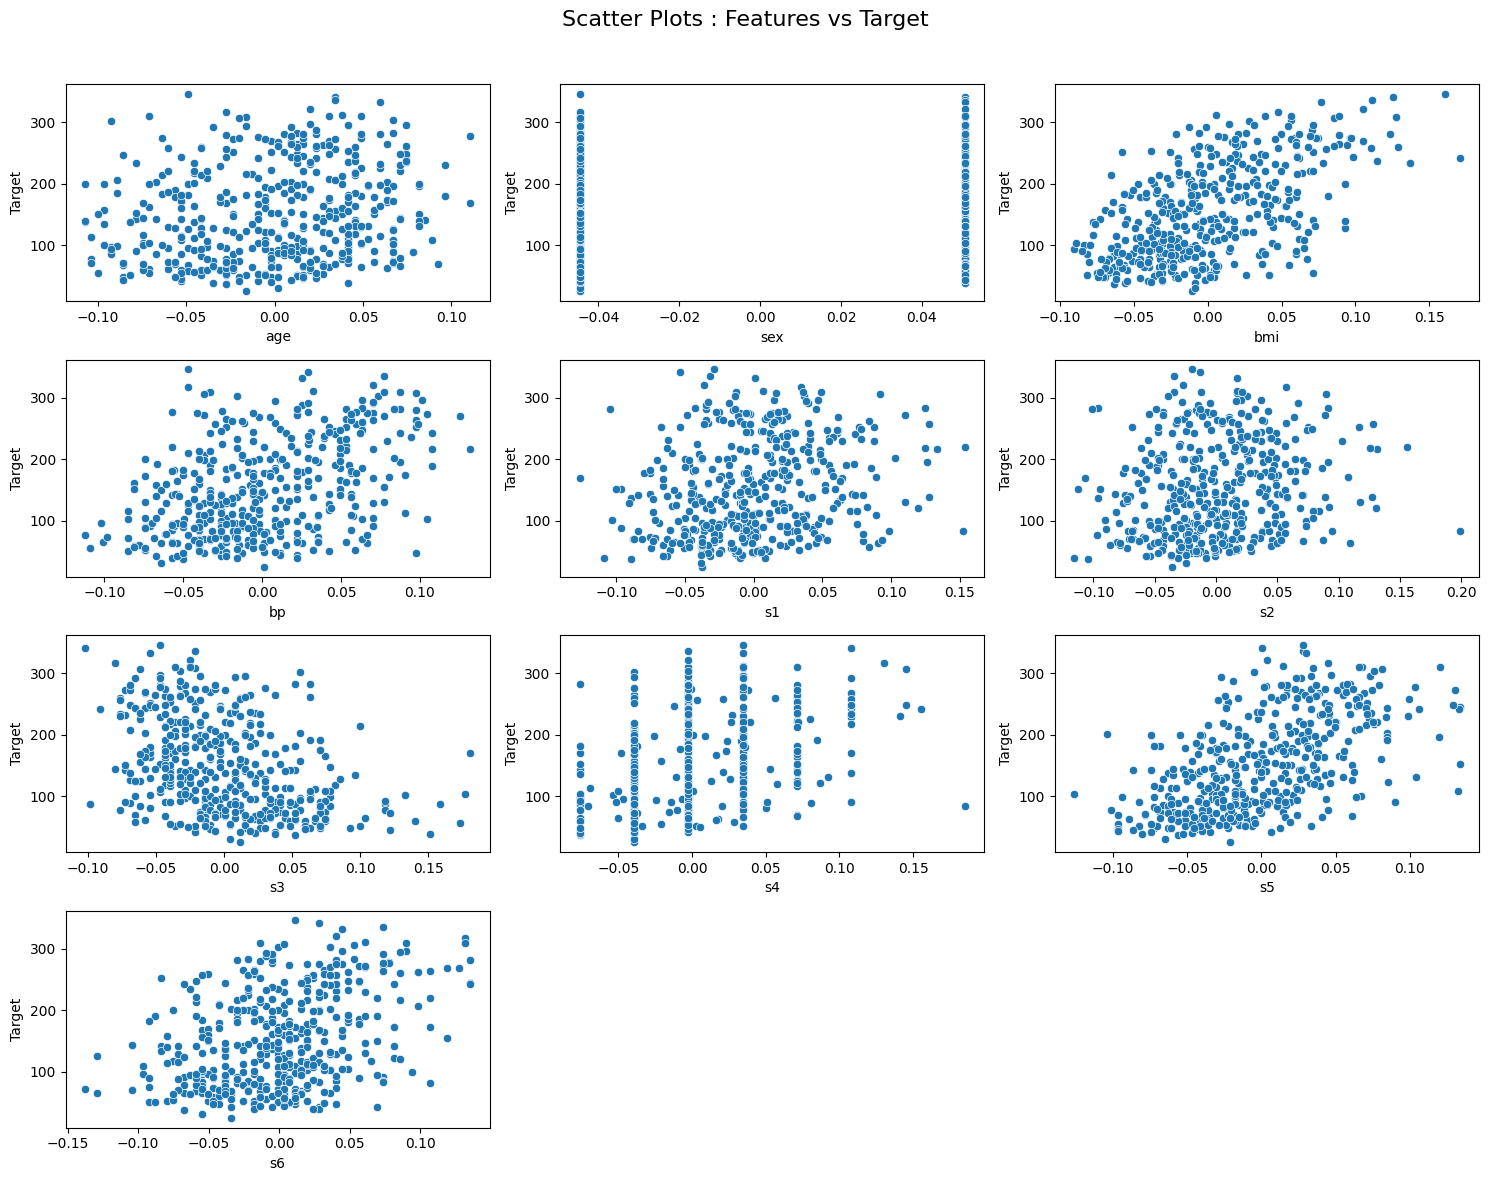

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(data.feature_names)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,12))
fig.suptitle("Scatter Plots : Features vs Target", fontsize=16)

# Plot each feature against the target
for idx, feature in enumerate(data.feature_names):
    row, col = divmod(idx, 3)
    sns.scatterplot(x=df[feature], y=df['Target'], ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Target')

# Remove any empty subplots
for idx in range(num_features, 12):
    row, col = divmod(idx, 3)
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()        

In [8]:
from sklearn.model_selection import train_test_split

X=data.data
y=df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE : {mse_lr:.4f}")

Linear Regression MSE : 2900.1936


In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=10000, alpha=0.0001, learning_rate='invscaling', random_state=42)
sgd_reg.fit(X_train, y_train)

y_pred_sgd = sgd_reg.predict(X_test)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print(f"SGD Regression MSE : {mse_sgd:.4f}")

SGD Regression MSE : 2861.9484
